In [1]:
!pip install visualkeras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras
from PIL import ImageFont


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 15.5 MB/s eta 0:00:00


### **Do not forget to connect to GPU runtime before training**

In [23]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

In [24]:
X_train.shape

(35000, 32, 32, 3)

In [25]:
# Normalizing the values between -1 and 1

X_train  = X_train/255
X_test = X_test/255

In [26]:
# Create an ImageDataGenerator object with given augmentation settings(just an instance)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,      # Random rotation within the range of [-20, 20] degrees
    width_shift_range=0.1,  # Random horizontal shift within the range of [-0.1, 0.1] of the total width
    height_shift_range=0.1, # Random vertical shift within the range of [-0.1, 0.1] of the total height
    shear_range=0.2,        # Random shearing transformations within the range of [-0.2, 0.2]
    zoom_range=0.2,         # Random zoom within the range of [0.8, 1.2]
    horizontal_flip=True,   # Randomly flip inputs horizontally
    fill_mode='nearest' ,    # Fill any newly created pixels with the nearest available pixel value
    validation_split=0.2  # Split 20% of the data for validation
)

# Apply data augmentation to the training data
augmented_images = datagen.flow(X_train, Y_train)

# creating the validation data
validation_data = datagen.flow(X_train, Y_train, subset='validation')

## **`This is an Open assignment with minimum instructions`**
You are allowed to search all over the web--> find any articles or implement them--> try your experiments

> **---> create the model**\
**---> tune the hyperparameters like learning_rate, filter/kernel size**\
**---> optimize the result**


In [ ]:
"""
You have got some experience form last assignment '
Use that experience this time
"""

In [ ]:
#@title **IMPORTANT ANNOUNCEMENT**
"""
Now with this much freedom, you can do anything
So make sure you understand what you do and after the end of this assignment
 you will have explain all the code you tried in a viva exam
 this will be the mid term evaluation.
"""

## **YOUR EFFORTS WILL COUNT MORE THE RESULTS YOU GET**
> **So make sure all the time you spent on this notebook should be visible from the notebook**

In [ ]:
"""
Question: What is Batch Normalization? Why is it used for? How does it fix the
problem it is used for? [ Answer in atleast 300 words]
<cite your sources>

Answer:
In order to provide a more reliable and effective learning process, deep learning models frequently utilise the batch normalisation approach to normalise the activations of each layer over a batch of training samples. When training very deep neural networks, a technique called batch normalisation is used to standardise the inputs to each layer for each mini-batch.
As a result, the learning process is stabilised and the quantity of training epochs needed to train deep networks is significantly decreased. As a result, it can provide desired results by cutting down on the number of epochs, making the process more effective, less complicated, and quicker.
Batch normalisation is required, but first i need to tell about "internal covariate shift":
It can be difficult to train deep learning models with numerous layers because these models might be sensitive to the initial random weights and settings of the learning algorithm.
This might result in the learning process chasing a moving object indefinitely.
The "internal covariate shift" refers to this alteration in the distribution of inputs to network layers.
The fact that the model is updated layer-by-layer backward from the input to the output using an estimate of error that assumes the weights in the layers before the current layer are fixed presents one difficulty when training deep neural networks.
For instance, if it is anticipated that the previous layer would produce values, the weights of that layer are modified.
After the weights of the preceding layer were updated, this distribution was probably altered.
As a result, the update process is always chasing after a shifting target since every layer is altered throughout each update.
As the parameters of the preceding layers change during training, the distribution of the inputs to each layer also changes.
This makes it difficult to train models and slows down the training process by requiring lower learning rates and careful parameter setup.
Batch normalisation is required because of this.
It offers some regularisation, lowering generalisation error, and also standardises the inputs to a network, applied to either the activations of a preceding layer or inputs directly. It speeds up training, in some situations by half the epochs or better.
How does it address the Internal Covariate Shift issue?
The coordination of the updating of many model layers is aided by batch normalisation.
This is accomplished by scaling the layer's output and, more precisely, by standardising the activations of every input variable per mini-batch, such as the activations of a node from the preceding layer.
(Standardisation is the process of rescaling data so that it has a mean of 0 and a standard deviation of 1, for example, a standard Gaussian.)
When it comes to computer vision, this procedure is sometimes referred to as "whitening" when applied to pictures.
Standardising the preceding layer's activations ensures that the assumptions made by the next layer regarding the spread and distribution of inputs during the weight update remain mostly unchanged.
This has the effect of accelerating and stabilising the training process for DNN.
Less epochs are needed if the inputs to the layer are normalised.
Like the use of activation regularisation, it can also have a regularising impact, lowering generalisation error.
In addition to addressing the aforementioned issue, it smoothes and therefore simplifies the optimisation function that is being addressed during network training.
As a result, batch normalisation increases training efficiency, boosts stability (by preventing input changes during weight updates), smoothes out optimisation, and permits larger learning rates.


Ref Link: 'https://towardsdatascience.com/batch-normalisation-in-deep-neural-network-ce65dd9e8dbf'
'https://towardsdatascience.com/batch-normalisation-explained-5f4bd9de5feb'
"""

In [ ]:
"""
Tutorial: https://www.tensorflow.org/tutorials/images/classification

Above tutorial does exactly the same job
But I will zero marks for exact same model used in the tutorial

You need experiment with different layers and all those
experiments should be visible by your notebooks
"""

In [ ]:
#All My models are performing poorly.

In [ ]:
#Model 1: this was the last model i tried. I tried changing many values but couldn't increase the accuracy.

In [103]:
# model initialization
model = tf.keras.Sequential()

# Intermediate layers
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))

# final layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [104]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_100 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_87 (Bat  (None, 15, 15, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_101 (Conv2D)         (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                     

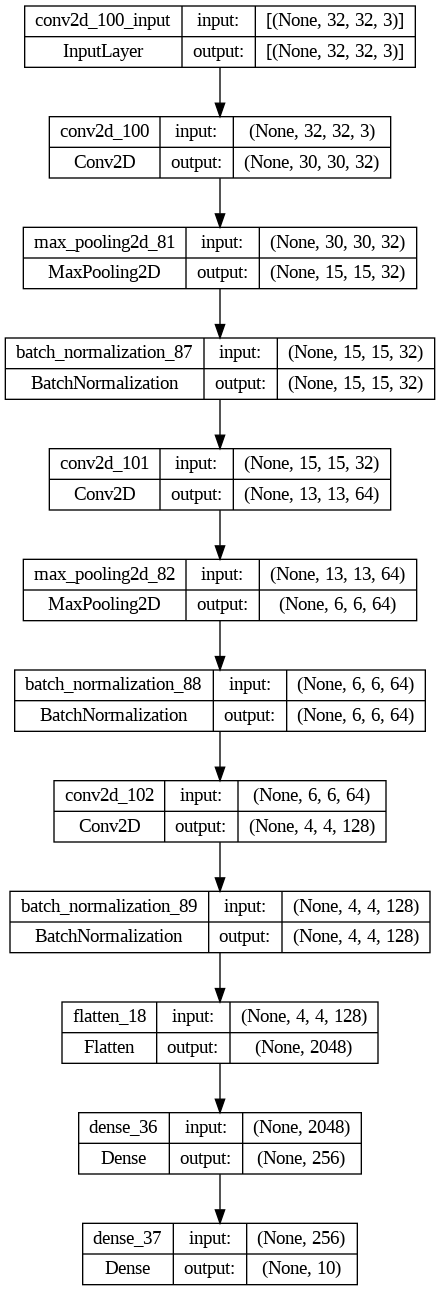

In [105]:
#@title Visualization

# just run this cell as it is
tf.keras.utils.plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

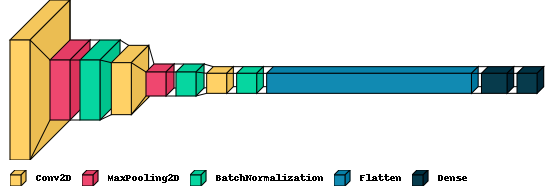

In [106]:
# just run this cell as it is
visualkeras.layered_view(model, legend=True)

In [107]:
"""
In the last part of the assignment
try experimenting with learning rate.
May be decreasing the lr might had help?
"""

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [108]:
# This is another way of dealing with the generated data
# both X_train and Y_train are inside the augmented image

history = model.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1094/1094 [==============================] - 31s 26ms/step - loss: 1.6727 - accuracy: 0.0981 - val_loss: 1.5042 - val_accuracy: 0.1210
Epoch 2/10
1094/1094 [==============================] - 28s 26ms/step - loss: 1.2654 - accuracy: 0.0978 - val_loss: 1.5473 - val_accuracy: 0.1249
Epoch 3/10
1094/1094 [==============================] - 27s 25ms/step - loss: 1.1424 - accuracy: 0.0985 - val_loss: 1.1425 - val_accuracy: 0.0986
Epoch 4/10
1094/1094 [==============================] - 28s 25ms/step - loss: 1.0623 - accuracy: 0.0994 - val_loss: 1.1187 - val_accuracy: 0.0974
Epoch 5/10
1094/1094 [==============================] - 29s 26ms/step - loss: 1.0052 - accuracy: 0.0985 - val_loss: 1.2758 - val_accuracy: 0.1293
Epoch 6/10
1094/1094 [==============================] - 28s 25ms/step - loss: 0.9548 - accuracy: 0.1001 - val_loss: 1.0084 - val_accuracy: 0.1040
Epoch 7/10
1094/1094 [==============================] - 27s 25ms/step - loss: 0.9164 - accuracy: 0.0991 - val_loss: 0.9938 - val_accura

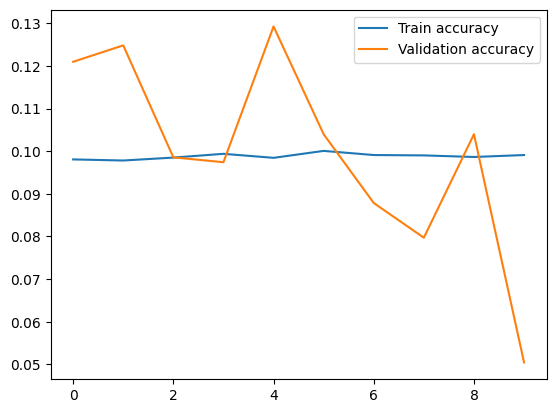

In [109]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [110]:
model.evaluate(X_test,Y_test)

469/469 [==============================] - 1s 3ms/step - loss: 1.1875 - accuracy: 0.0567


[1.1874972581863403, 0.05673333257436752]

## **TRY DIFFERENT MODELS AND COMPARE THE RESULTS**

In [ ]:
# MODEL 2: My first model which actually showed me output but very poor accuracies

In [ ]:
# model initialization
model = tf.keras.Sequential()

# Intermediate layers
model.add(tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((3,3)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((3,3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))

# final layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 9, 9, 16)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 32)          4640      
                                                                 
 conv2d_13 (Conv2D)          (None, 5, 5, 32)          9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                  

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
history = model.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10
1094/1094 [==============================] - 32s 27ms/step - loss: 1.9397 - accuracy: 0.1146 - val_loss: 1.8174 - val_accuracy: 0.0444
Epoch 2/10
1094/1094 [==============================] - 30s 27ms/step - loss: 1.7042 - accuracy: 0.0918 - val_loss: 1.6617 - val_accuracy: 0.1024
Epoch 3/10
1094/1094 [==============================] - 27s 25ms/step - loss: 1.5992 - accuracy: 0.0915 - val_loss: 1.5387 - val_accuracy: 0.0504
Epoch 4/10
1094/1094 [==============================] - 30s 27ms/step - loss: 1.5272 - accuracy: 0.0903 - val_loss: 1.5101 - val_accuracy: 0.0586
Epoch 5/10
1094/1094 [==============================] - 28s 25ms/step - loss: 1.4726 - accuracy: 0.0931 - val_loss: 1.4285 - val_accuracy: 0.1001
Epoch 6/10
1094/1094 [==============================] - 28s 26ms/step - loss: 1.4405 - accuracy: 0.0925 - val_loss: 1.4390 - val_accuracy: 0.0799
Epoch 7/10
1094/1094 [==============================] - 28s 26ms/step - loss: 1.4041 - accuracy: 0.0951 - val_loss: 1.4066 -

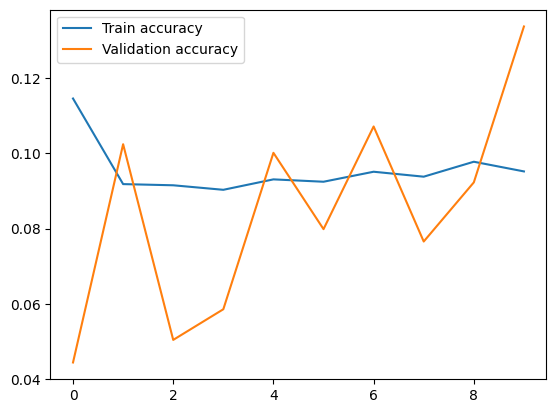

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
model.evaluate(X_test,Y_test)

469/469 [==============================] - 1s 3ms/step - loss: 1.2699 - accuracy: 0.1133


[1.269930124282837, 0.11326666921377182]

In [ ]:
#Model 3:

In [ ]:
# model initialization
model = tf.keras.Sequential()

# Intermediate layers
model.add(tf.keras.layers.Conv2D(8, (3,3), activation = 'relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((3,3)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((3,3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 8)         224       
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 16)        1168      
                                                                 
 conv2d_23 (Conv2D)          (None, 26, 26, 16)        2320      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_24 (Conv2D)          (None, 6, 6, 32)          4640      
                                                                 
 conv2d_25 (Conv2D)          (None, 4, 4, 32)          9248      
                                                      

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
history = model.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10
1094/1094 [==============================] - 33s 28ms/step - loss: 1.9315 - accuracy: 0.1378 - val_loss: 1.7141 - val_accuracy: 0.0760
Epoch 2/10
1094/1094 [==============================] - 30s 27ms/step - loss: 1.6544 - accuracy: 0.1025 - val_loss: 1.6046 - val_accuracy: 0.0547
Epoch 3/10
1094/1094 [==============================] - 28s 26ms/step - loss: 1.5361 - accuracy: 0.1001 - val_loss: 1.4983 - val_accuracy: 0.0891
Epoch 4/10
1094/1094 [==============================] - 29s 27ms/step - loss: 1.4705 - accuracy: 0.0988 - val_loss: 1.4564 - val_accuracy: 0.1307
Epoch 5/10
1094/1094 [==============================] - 28s 26ms/step - loss: 1.4104 - accuracy: 0.1013 - val_loss: 1.4050 - val_accuracy: 0.0703
Epoch 6/10
1094/1094 [==============================] - 29s 27ms/step - loss: 1.3796 - accuracy: 0.0988 - val_loss: 1.3711 - val_accuracy: 0.1204
Epoch 7/10
1094/1094 [==============================] - 30s 27ms/step - loss: 1.3451 - accuracy: 0.0991 - val_loss: 1.2861 -

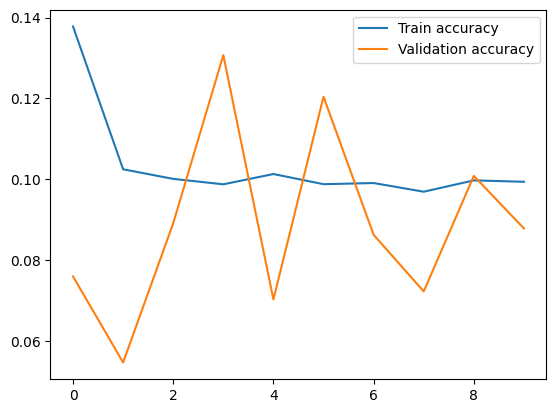

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
model.evaluate(X_test,Y_test)

469/469 [==============================] - 1s 3ms/step - loss: 1.2251 - accuracy: 0.0791


[1.2251170873641968, 0.07913333177566528]

In [ ]:
#Model 4: First model using batch normalisation but couldn't observe much changes.

In [ ]:
# model initialization
model = tf.keras.Sequential()

# Intermediate layers
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))

# final layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 15, 15, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                      

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
history = model.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1094/1094 [==============================] - 39s 25ms/step - loss: 1.5794 - accuracy: 0.1009 - val_loss: 1.4659 - val_accuracy: 0.1016
Epoch 2/10
1094/1094 [==============================] - 28s 26ms/step - loss: 1.3291 - accuracy: 0.0997 - val_loss: 1.2823 - val_accuracy: 0.0727
Epoch 3/10
1094/1094 [==============================] - 27s 25ms/step - loss: 1.2221 - accuracy: 0.0977 - val_loss: 1.5295 - val_accuracy: 0.1823
Epoch 4/10
1094/1094 [==============================] - 28s 25ms/step - loss: 1.1495 - accuracy: 0.1005 - val_loss: 1.2219 - val_accuracy: 0.1484
Epoch 5/10
1094/1094 [==============================] - 28s 26ms/step - loss: 1.0902 - accuracy: 0.0994 - val_loss: 1.0647 - val_accuracy: 0.0811
Epoch 6/10
1094/1094 [==============================] - 28s 26ms/step - loss: 1.0583 - accuracy: 0.0993 - val_loss: 1.0180 - val_accuracy: 0.1074
Epoch 7/10
1094/1094 [==============================] - 27s 24ms/step - loss: 1.0279 - accuracy: 0.0989 - val_loss: 0.9592 - val_accura

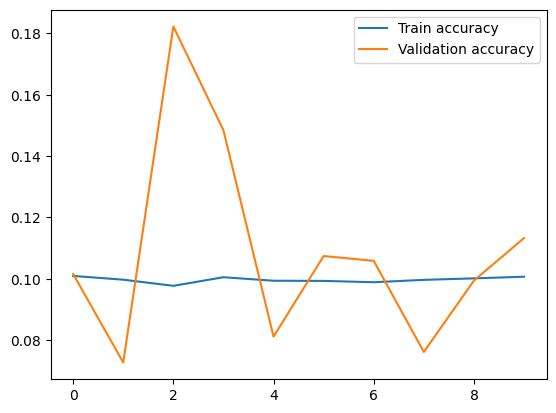

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
model.evaluate(X_test,Y_test)

469/469 [==============================] - 1s 3ms/step - loss: 0.8544 - accuracy: 0.1122


[0.8544197082519531, 0.11219999939203262]